<a href="https://colab.research.google.com/github/AbhishekCbanaj/Uber-Trip-Analysis-Machine-Learning-Project/blob/master/Uber_Trip_Analysis_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Uber dataset
uber_data = pd.read_csv("/content/Uber.csv")

# Display the first few rows of the dataset to understand its structure
uber_data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


# **`Data Preprocessing`**

In [ ]:
# Convert the 'date' column to datetime format
uber_data['date'] = pd.to_datetime(uber_data['date'], format='%m/%d/%Y')

# Extract month, day, and weekday from the 'date' column
uber_data['month'] = uber_data['date'].dt.month
uber_data['day'] = uber_data['date'].dt.day
uber_data['weekday'] = uber_data['date'].dt.weekday

# Check for missing values
missing_values = uber_data.isnull().sum()


# `**Step 2: Exploratory Data Analysis (EDA)**`

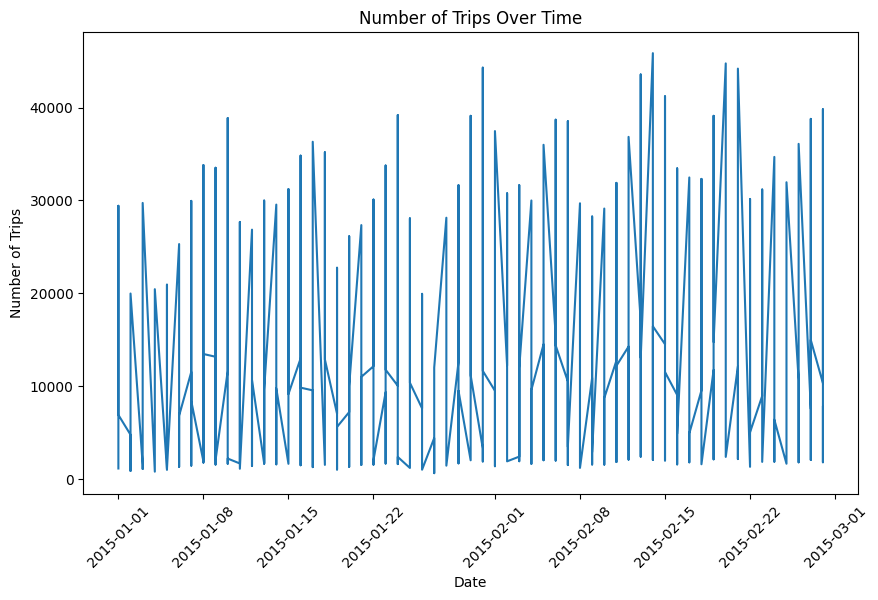

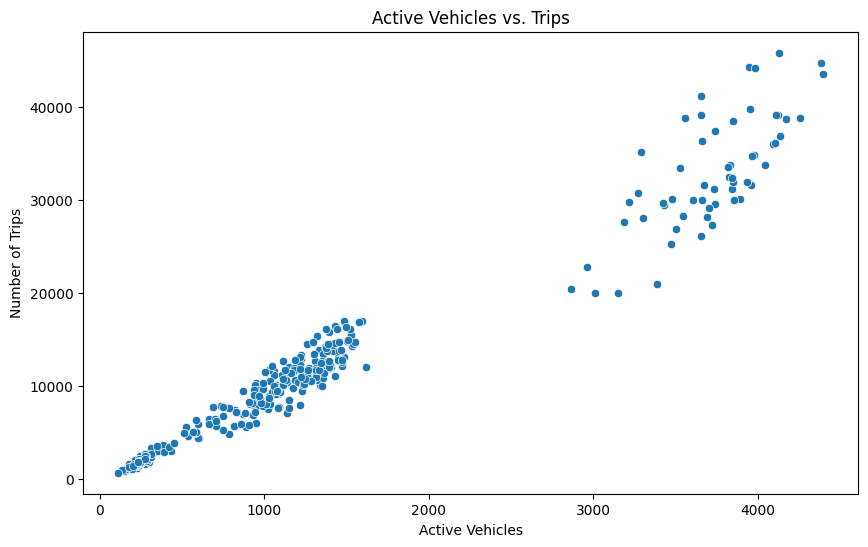

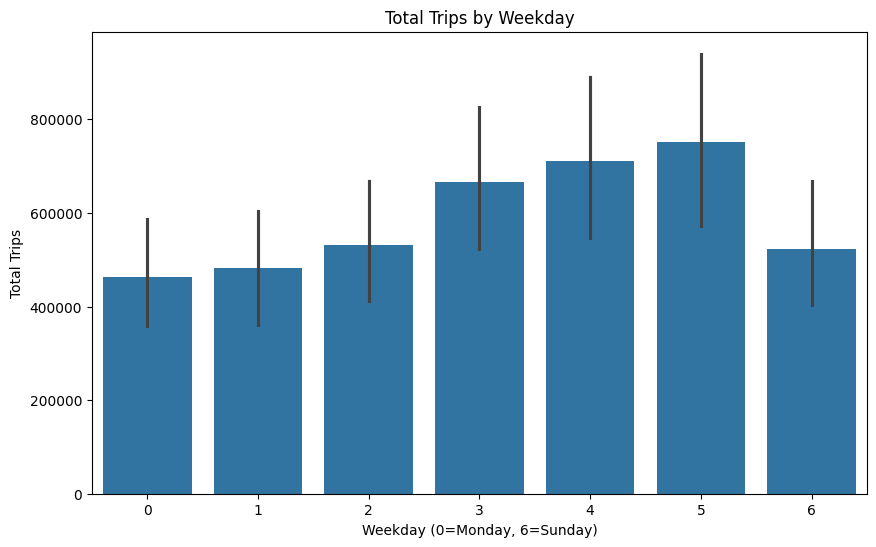

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of trips over time
plt.figure(figsize=(10,6))
plt.plot(uber_data['date'], uber_data['trips'], label='Trips')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Over Time')
plt.xticks(rotation=45)
plt.show()

# Plotting the relationship between active vehicles and trips
plt.figure(figsize=(10,6))
sns.scatterplot(x='active_vehicles', y='trips', data=uber_data)
plt.xlabel('Active Vehicles')
plt.ylabel('Number of Trips')
plt.title('Active Vehicles vs. Trips')
plt.show()

# Trips by day of the week
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='trips', data=uber_data, estimator=sum)
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Total Trips')
plt.title('Total Trips by Weekday')
plt.show()

# **`Step 3: Model Development (Linear Regression)`**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Defining features and target variable
# We use active_vehicles, month, day, and weekday as features
X = uber_data[['active_vehicles', 'month', 'day', 'weekday']]  # Independent variables
y = uber_data['trips']  # Dependent variable (target)

# Step 2: Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Step 4: Making predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluating model performance
# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# Calculate MAE (Mean Absolute Error) for additional performance metric
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Root Mean Squared Error: 1584.9560070540047
Mean Absolute Error: 1149.9826812975798


# **`Step 4: Performance Evaluation`**

In [ ]:
# Import the necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print out the results
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Squared: {r2}')


Root Mean Squared Error (RMSE): 1584.9560070540047
Mean Absolute Error (MAE): 1149.9826812975798
R-Squared: 0.976703196911742


# **`Step 5: Optimization and Insights`**

# *1. Feature Engineering*

In [ ]:
import numpy as np

# Simulating rain and temperature data (e.g., random values for testing purposes)
# Simulating rain as binary (0 for no rain, 1 for rain)
uber_data['rain'] = np.random.randint(0, 2, uber_data.shape[0])

# Simulating temperature between a reasonable range (e.g., 60°F to 90°F)
uber_data['temperature'] = np.random.uniform(60, 90, uber_data.shape[0])

# Add time of day as a new feature (optional, extracted from the 'date' column)
uber_data['hour'] = uber_data['date'].dt.hour

# Redefine the feature matrix to include new features
X = uber_data[['active_vehicles', 'month', 'day', 'weekday', 'rain', 'temperature', 'hour']]
y = uber_data['trips']

# Now proceed with the same model development and evaluation steps as before

# *2. Model Tuning and Experimentation*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f'Random Forest RMSE: {rmse_rf}')


Random Forest RMSE: 1237.4574210771348


# *3. Cross-Validation*

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Linear Regression model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-cv_scores.mean()) ** 0.5
print(f'Cross-validated RMSE: {rmse_cv}')


Cross-validated RMSE: 1873.5522885989633
